<a href="https://colab.research.google.com/github/kdm1258/self_studying_ML_DL/blob/main/%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망(DNN)

심층 신경망(DNN)은 여러 층으로 구성된 인공 신경망이다. 각 층은 여러 뉴런으로 구성되어 있으며, 입력 데이터를 처리하여 출력으로 변환하는 역할을 한다. DNN은 주로 이미지 인식, 음성 인식, 자연어 처리 등 다양한 분야에서 사용된다.


DNN의 구조는 입력층, 여러 개의 은닉층, 출력층으로 이루어져 있다. 입력층은 원본 데이터를 받아들이고, 은닉층은 데이터의 특징을 추출하며, 출력층은 최종 결과를 도출한다.


심층 신경망의 학습 과정은 주로 역전파 알고리즘을 통해 이루어지며, 이 과정에서 가중치와 편향이 조정된다. 이를 통해 모델의 예측 성능을 향상시킬 수 있다.


DNN은 데이터의 복잡한 패턴을 학습하는 데 뛰어난 성능을 발휘하여, 인공지능 분야에서 중요한 역할을 한다.

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


이미지의 픽셀 값을 0 ~ 255 범위에서 0 ~ 1사이의 범위로 변환하고, 28 x 28 크기의 2차원 배열을 784크기의 1차원 배열로 변환.

train 데이터를 검증데이터(val_)와 훈련데이터(train_)으로 분할

In [3]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

심층 신경망은 신경망 모델과 달리 입력층과 출력층 사이에 밀집층이 추가 된 것을 의미하며, 이를 **은닉층**이라고 부른다.

은닉층에는 활성화 함수가 적용되는데, 출력층은 활성화 함수가 제한된 반면(이진 분류 - sigmoid / 다중 분류 - softmax), 은닉층은 비교적 자유로운 활성화 함수를 가진다.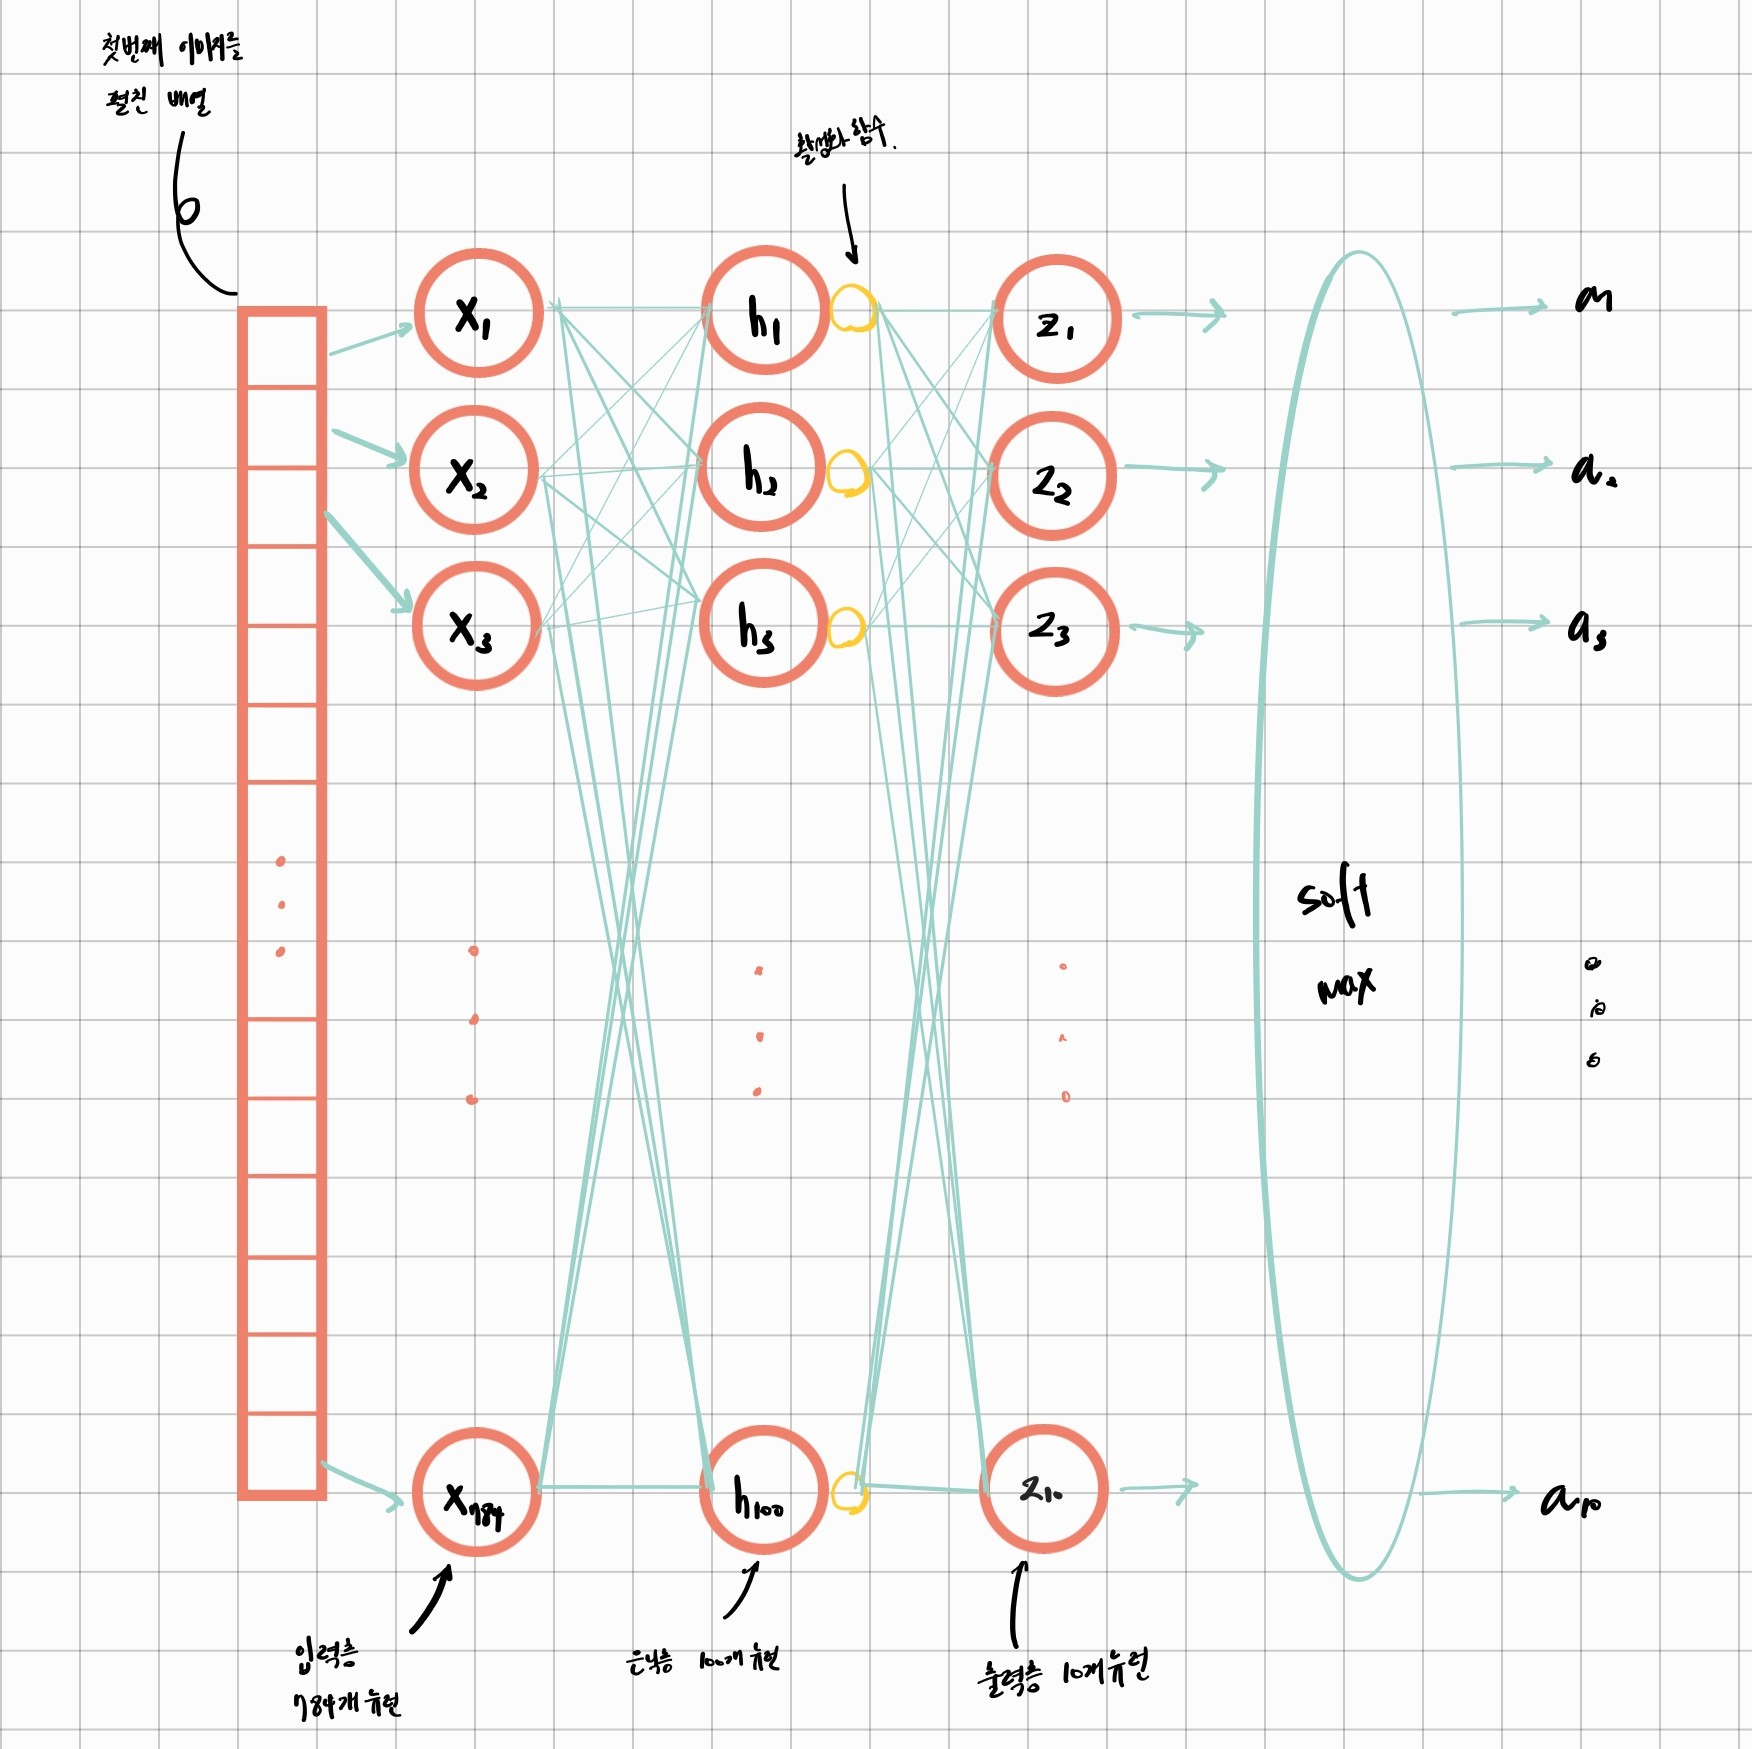


### 회귀를 위한 신경망의 출력층에서는 어떤 활성화 함수를 사용할까?

회귀를 위한 인공신경망에서도 활성화 함수가 사용된다. 단, 회귀 문제의 **출력층**에서는 활성화 함수를 사용하지 않는 경우가 일반적이다. 이는 회귀의 목표가 연속적인 숫자 값을 예측하는 것이기 때문이다.

다음은 일반적인 회귀를 위한 인공신경망에서 각 층의 활성화 함수 사용 예시이다:

- 은닉층: ReLU, Sigmoid, Tanh 등의 활성화 함수를 사용하여 비선형성을 도입하고, 모델이 더 복잡한 패턴을 학습할 수 있도록 한다.

- 출력층: 활성화 함수를 사용하지 않거나, 선형 활성화 함수(identity)를 사용하여 예측 값이 실수 값을 가지도록 한다.

In [4]:
# sigmoid를 활용한 은닉층과 softmax를 사용한 출력층을 Dense 클래스로 만들기

dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model = keras.Sequential([dense1, dense2])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 맨 첫줄에 모델의 이름이 나온다.
- 그다음 이 모델에 들어 있는 층이 순서대로 나열된다.
- 층마다 층 이름, 클래스, 출력크기, 모델 파라미터개수가 출력된다.

출력 크기는 **(None, 100)**으로 첫 번째 차원은 샘플의 개수를 의미한다.
샘플의 개수가 아직 정의되지 않아 None으로 표시된다.

케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한번에 모두 사용하는 것이 아니라 잘게 나누어 여러 번에 걸친 경사하강법을 수행하기 때문이다.**(미니 배치 GD)**

케라스의 기본 미니 배치 크기는 32개이며, 이 값은 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있다. 따라서 샘플 수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정한 것이다.

이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 **배치 차원**이라고 부른다.

두 번째 100은 은닉층의 뉴런 개수를 100으로 두어 100개로 압축되어 출력되는 것을 의미한다.

마지막으로 모델 파라미터 개수가 출력된다.

이 층은 Dense 층이므로 입력 픽셀 784개와 은닉층 100개의 모든 조합에 대한 가중치가 있다. 그리고 뉴런마다 한개의 절편(bias)가 존재한다.

따라서 784 * 100 + 100 = 78500이다.

summary() 매서드의 마지막에는 총 모델 파라미터의 총 합이 출력된다.

그 아래는 훈련되지 않은 파라미터(Non-trainable parameter)가 0으로 출력된다. 간혹 경사하강법으로 훈련되지 않은 파라미터를 가진 층이 존재하는데 이 층의 파라미터 개수가 출력되는 자리이다.

## 층을 추가하는 다른 방법

In [7]:
from os import name

# keras.Sequential()의 파라미터로 전달
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape = (784,), name = 'hidden'), keras.layers.Dense(10,activation='softmax', name = 'output')], name = 'fashion_MNIST_model')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "fashion_MNIST_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# add 메서드 활용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7591 - loss: 0.7638
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8470 - loss: 0.4186
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8605 - loss: 0.3852
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8690 - loss: 0.3603
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8760 - loss: 0.3369


## ReLU 함수


$$
f(x) = \text{ReLU}(x) = \max(0, x)
$$


ReLU 함수는 신경망에서 활성화 함수로 자주 사용되는 함수이다. 이 함수는 입력값
𝑥
가 0보다 크면 그 값을 그대로 출력하고, 0 이하이면 0을 출력한다. 이로 인해 신경망의 비선형성을 추가하게 되며, 학습이 더 잘 이루어진다.

ReLU 함수의 장점 중 하나는 시그모이드 함수나 탄젠트 하이퍼볼릭 함수와 달리, 매우 큰 값에서 미분이 소멸되지 않으므로 기울기 소실 문제를 완화할 수 있다는 점이며 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.

In [13]:
# Flatten() 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할을 한다.
# 인공 신경망의 성능에 기여하는 바가 없지만 입력층과 은닉층 사이에 존재하므로 이를 층이라고 부르긴 한다.
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Flatten 클래스에 포함된 모델 파라미터는 0개이다. Flatten층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있다는 장점이 있다.(784개)

In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7703 - loss: 0.6596
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8535 - loss: 0.3992
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8728 - loss: 0.3570
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8808 - loss: 0.3311
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8866 - loss: 0.3136


In [17]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.3562


[0.35989391803741455, 0.8740833401679993]

ReLU함수를 사용했을 때 sigmoid를 사용했을 때보다 정확도가 증가했다.

## 옵티마이저

인공 신경망에서 옵티마이저(optimizer)는 신경망의 가중치와 바이어스를 조정하여 손실 함수(loss function)를 최소화하는 알고리즘이다. 간단히 말해서, 모델이 예측한 값과 실제 값 간의 차이를 줄이는 역할을 한다. 옵티마이저는 신경망의 학습 과정을 제어하고, 학습률(learning rate)을 관리하여 모델이 효과적으로 학습할 수 있도록 돕는다.

주요 옵티마이저로는 다음과 같은 것들이 있다:

- 경사하강법 (Gradient Descent): 가장 기본적인 옵티마이저로, 손실 함수의 기울기를 따라 가중치를 업데이트하는 방법이다.

- 확률적 경사하강법 (Stochastic Gradient Descent, SGD): 전체 데이터셋이 아닌, 랜덤하게 선택된 작은 미니배치(mini-batch)를 사용하여 경사하강법을 적용하는 방법이다.

- 모멘텀 (Momentum): SGD의 단점을 보완하기 위해 기울기 변화량에 관성을 추가하여 빠르고 안정적으로 최적해에 도달하도록 돕는 방법이다.

- RMSProp: 각 가중치의 업데이트 크기를 적응적으로 조정하여 학습률을 자동으로 조절하는 방법이다.

- Adam (Adaptive Moment Estimation): 모멘텀과 RMSProp을 결합한 알고리즘으로, 학습률을 자동으로 조절하고 빠르게 수렴하는 특징을 갖고 있다.

각 옵티마이저는 특정한 문제와 데이터셋에 따라 성능이 다를 수 있으며, 실험을 통해 가장 적합한 옵티마이저를 선택하는 것이 중요하다.

In [18]:
# 가장 기본적인 옵티마이저인 SGD를 적용한 모델을 생성해보자
# optimizer = 'sgd'로 설정하면 자동으로 SGD클래스의 객체를 만들어 준다.
model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# 'sgd'를 사용하지 않는다면 객체를 따로 생성해주어야함.
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# learning rate를 변경하려면 옵티마이저 객체의 매개변수로 전달해야한다.
sgd = keras.optimizers.SGD(learning_rate = 0.1)

SGD 클래스의 momentum 매개변수의 기본값은 0이며, 이를 0보다 큰 값으로 할당 시 이전의 기울기를 가속도처럼 사용하는 **모멘텀최적화(momentum optimization)**를 사용한다.

보통 momentum 매개변수는 0.9이상을 사용한다.

다음처럼 SGD클래스의 nesterov 매개변수를 True로 바꾸면 **네스테로프 모멘텀 최적화**를 사용한다.

In [21]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다.

모델이 최적점에 가까이 갈수록 학습률을 낮추며, 이렇게 하면 안정적으로 최적점에 수렴 할 가능성이 높다. 이러한 학습률을 **적응형 학습률(adaptive learning rate)**라고 한다.

In [22]:
# 옵티마이저로 Adagrad를 사용할 때
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# 옵티마이저로 RMSprop를 사용할 때
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# 옵티마이저로 Adam을 사용할 때
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7687 - loss: 0.6686
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8551 - loss: 0.4073
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8697 - loss: 0.3557
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8823 - loss: 0.3239
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8885 - loss: 0.3047


In [26]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8764 - loss: 0.3422


[0.3401963710784912, 0.8762500286102295]

In [37]:
import numpy as np
prediction = model.predict(val_scaled[100:101])
print(np.max(prediction))
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.932599
2


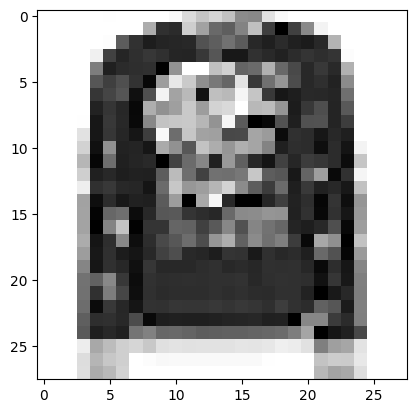

In [33]:
import matplotlib.pyplot as plt
plt.imshow(val_scaled[100].reshape(28, 28), cmap='gray_r')

fashion_mnist의 label은 다음과 같다

{0:티셔츠, 1:바지, 2:스웨터, 3:드레스, 4:코드, 5:샌달, 6:셔츠, 7:스니커즈, 8:가방, 9:앵클부츠}

따라서 인덱스 2인 스웨터로 잘 예측한 것을 알 수 있다.